In [4]:
import pydicom
import numpy as np
import random
import os
from PIL import Image

# DICOM dosyasını oku
ds = pydicom.dcmread("islenen_dicomlar_astro/TCGA-DB-A75L_b09f3bb0-2679-4a46-81cd-39c771c5b14d.dcm")  # Buraya kendi DICOM dosya adını yaz

# Görüntü verisini al
data = ds.pixel_array  # Beklenen şekil: (2500, 240, 240, 3)

# Şekli kontrol et
print(f"Veri şekli: {data.shape}")

# Kayıt klasörü oluştur
output_dir = "kayitli_pngler"
os.makedirs(output_dir, exist_ok=True)

# Rastgele 10 indeks seç
indices = random.sample(range(data.shape[0]), 10)

# Seçilen görüntüleri PNG olarak kaydet
for i, idx in enumerate(indices):
    img = data[idx]

    # Tip dönüşümü (gerekirse)
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    image = Image.fromarray(img, mode="RGB")
    image.save(os.path.join(output_dir, f"renkli_{i+1}.png"))

print("10 rastgele renkli görüntü başarıyla kaydedildi.")


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_per_cluster(model_output, cluster_output, num_clusters=10):
    # Gerçek etiketler hep 0 olduğu için: doğru tahmin = model_output == 0
    correct_mask = (model_output == 0)
    accuracies = []

    for cluster_id in range(num_clusters):
        mask = (cluster_output == cluster_id)

        if mask.sum() == 0:
            accuracy = 0.0
        else:
            correct = (correct_mask & mask).sum()
            total = mask.sum()
            accuracy = (correct / total) * 100

        accuracies.append(accuracy)

    # Grafik çizimi
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(num_clusters), accuracies, tick_label=[f"{cid}" for cid in range(num_clusters)])
    plt.ylabel("Correct prediction rate")
    plt.xlabel("Clusters")
    plt.title("Prediction Rate For Each Cluster")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Barların üstüne yüzdeleri yaz
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{acc:.1f}%", ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()
   



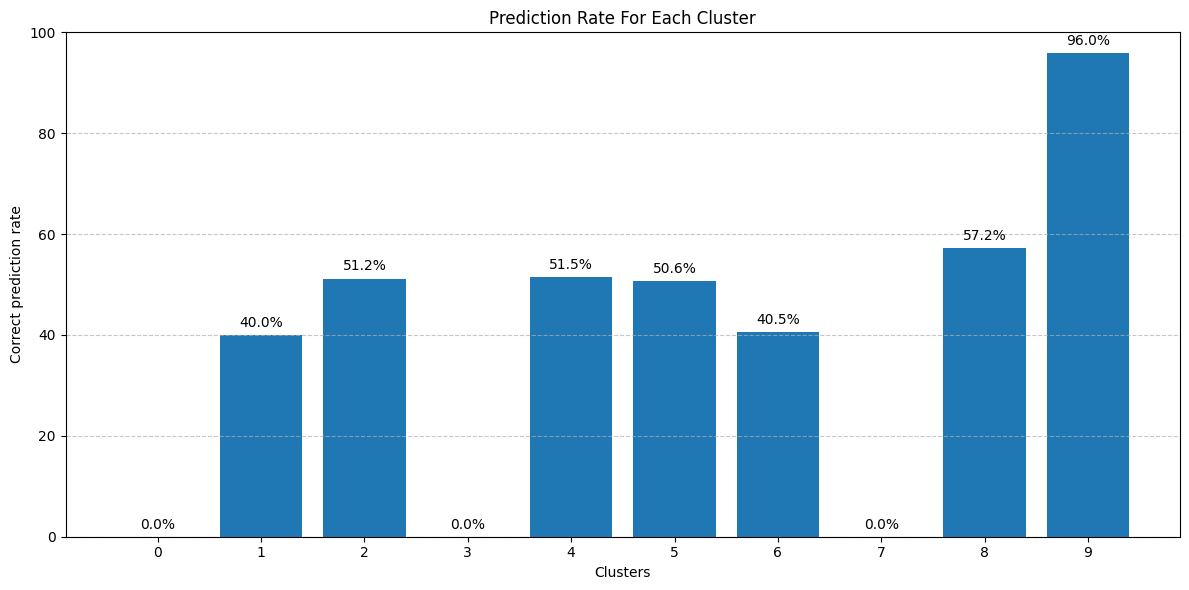

In [2]:
model_output = np.load("class_preds.npy")
cluster_output = np.load("cluster_labels.npy")

plot_accuracy_per_cluster(model_output, cluster_output, num_clusters=10)
